In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
import os

from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We'll hack a bit with the t-SNE code in sklearn.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
#from sklearn.utils.extmath import _ravel
# Random state we define this random state to use this value in TSNE which is a randmized algo.
RS = 42

# Importing matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
from subprocess import check_output
from skimage.io import imread, imshow
from glob import glob

%matplotlib inline

# Importing seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})


basepath = ""
# check the types in training data
print(check_output(["ls", basepath]).decode("utf8"))

Type_1
Type_2
Type_3



### Count the number of images in each type

In [2]:
all_cervix_images = []

for path in sorted(glob(basepath + "*")):
    cervix_type = path.split("/")[-1]
    cervix_images = sorted(glob(basepath + cervix_type + "/*"))
    all_cervix_images = all_cervix_images + cervix_images

all_cervix_images = pd.DataFrame({'imagepath': all_cervix_images})
all_cervix_images['filetype'] = all_cervix_images.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
all_cervix_images['type'] = all_cervix_images.apply(lambda row: row.imagepath.split("/")[-2], axis=1)
all_cervix_images.head()

,imagepath,filetype,type
0,/home/ec2-user/SageMaker/mengzhao/image_classi...,jpg,Type_1
1,/home/ec2-user/SageMaker/mengzhao/image_classi...,jpg,Type_1
2,/home/ec2-user/SageMaker/mengzhao/image_classi...,jpg,Type_1
3,/home/ec2-user/SageMaker/mengzhao/image_classi...,jpg,Type_1
4,/home/ec2-user/SageMaker/mengzhao/image_classi...,jpg,Type_1


We have a total of 1481 images in the whole dataset


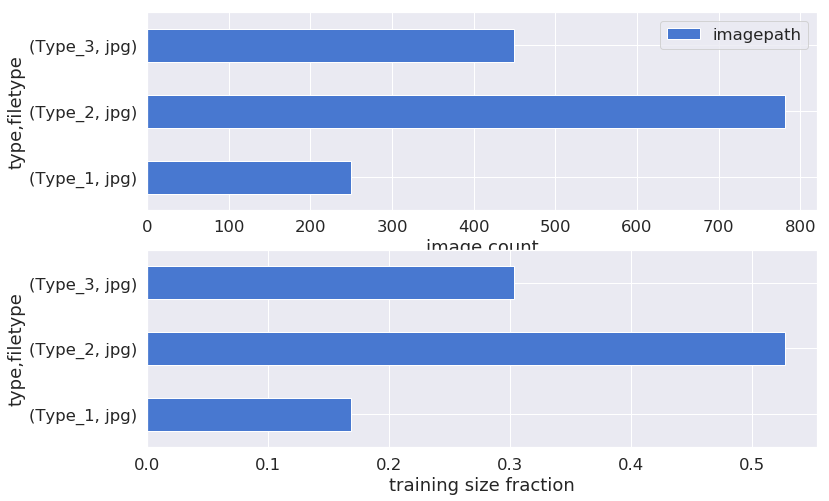

In [3]:
print('We have a total of {} images in the whole dataset'.format(all_cervix_images.shape[0]))

# count the type in each category
type_aggregation = all_cervix_images.groupby(['type', 'filetype']).agg('count')

# calculate the percentage of each type
type_aggregation_p = type_aggregation.apply(lambda row: 1.0*row['imagepath']/all_cervix_images.shape[0], axis=1)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

type_aggregation.plot.barh(ax=axes[0])
axes[0].set_xlabel("image count")
type_aggregation_p.plot.barh(ax=axes[1])
axes[1].set_xlabel("training size fraction")

plt.savefig("./image_count.png", dpi = 300)

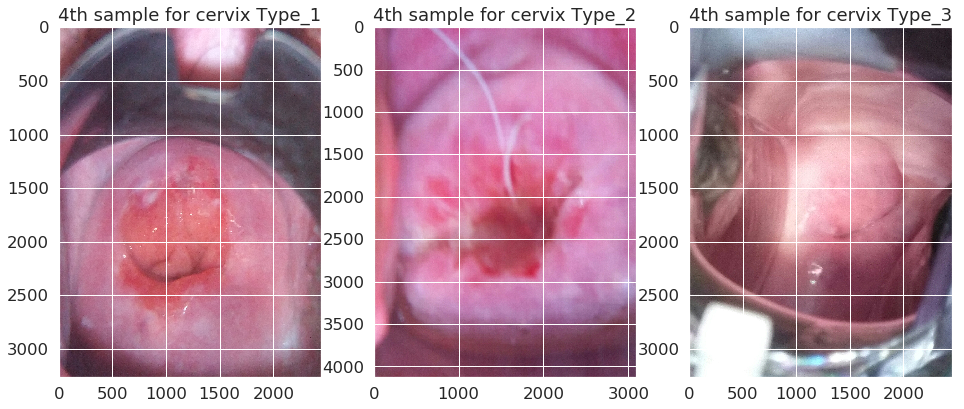

In [4]:
# suppress a specific warning
warnings.filterwarnings("ignore", "(Possibly )?corrupt EXIF data", UserWarning)

fig = plt.figure(figsize=(16,8))

i = 1
for t in all_cervix_images['type'].unique():
    ax = fig.add_subplot(1,3,i)
    i+=1
    
    # fetch the nth images in each category  
    n = 4
    
    f = all_cervix_images[all_cervix_images['type'] == t]['imagepath'].values[n]
    plt.imshow(plt.imread(f))
    plt.title('{}th sample for cervix {}'.format(n,t))
    plt.savefig("./{}th sample for cervix.png".format(n), dpi = 300)